# Linear Predictors

In statistics and in machine learning, a linear predictor function is a linear function of a set of coefficients and explanatory variables, whose value is used to predict the outcome of a dependent variable. This sort of function usually comes in linear regression, where the coefficients are called regression coefficients. However, they also occur in various types of linear classifiers, as well as in various other models, such as principal component analysis and factor analysis. In many of these models, the coefficients are referred to as "weights".

## Variables and Terms

**Feature vector**

  - For an input $x$, its feature vector is: $\phi(x) = [\phi_1(x), \dots, \phi_d(x)]$
  - This maps to $\phi(x) \in \Reals^d$
  - Think of $\phi(x) \in \Reals^d$ as a point in a high-dimensional space.
  - Mathematically, feature vectors don't need feature names.
  - Suppose we have this feature for an email address from a likely spam message.
  - Sample feature vector:

  $$
  \boxed{
    \begin{alignat*}{2}
      & \text{length>10}       & : 1 \\
      & \text{fracOfAlpha}     & : 0.8 \\
      & \text{contains\_@}     & : 1 \\
      & \text{endsWith\_.com}  & : 1 \\
      & \text{endsWith\_.org}  & : 0 \\
      & \text{...}
    \end{alignat*}
  } 
  \rightarrow
  \begin{bmatrix}
    1 \\
    0.85 \\
    1 \\
    1 \\
    0
  \end{bmatrix}
  $$

**Weight vector**

  - For each feature $j$, have a real number $w_j$ representing contribution of feature to prediction.
  - This maps to $\boldsymbol{ \text{w} } \in \Reals^d$
  - Sample weight vector:

  $$
  \boxed{
    \begin{alignat*}{2}
      & \text{length>10}       & : -1.2 \\
      & \text{fracOfAlpha}     & : 0.6 \\
      & \text{contains\_@}     & : 3 \\
      & \text{endsWith\_.com}  & : 2.2 \\
      & \text{endsWith\_.org}  & : 1.4 \\
      & \text{...}
    \end{alignat*}
  }
  $$

  > This sample **weight vector** is a weight of the corresponding feature vector above.

**Score**

  - A weighted combination of features.
  - It is a dot product of the feature vector and the weight vector.
  - It is denoted by:
    $$
    \boldsymbol{ \text{w} } \cdot \phi(x) = \textstyle\sum_{j = 1}^{d} w_j\phi(x)_j
    $$
  - Example: $-1.2(1) + 0.6(0.85) + 3(1) + 2.2(1) + 1.4(0) = 4.51$ as the score.

## Let's Try Putting The Pieces Together

So, linear classification is also called commonly as **binary classification**, such that this predictor will output two states only. The output is usually $(1, -1)$ or $(1, 0)$. 

A linear classifier is denoted by $f_w(x)$.

In this example, this predictor will look at the score and returns the sign of that score. It is defined by the following piecewise function:

$$
  f_w(x) = \text{sign}(\boldsymbol{ \text{w} } \cdot \phi(x)) =
  \begin{cases}
    +1 &\text{if }\boldsymbol{ \text{w} } \cdot \phi(x) > 0 \\
    -1 &\text{if }\boldsymbol{ \text{w} } \cdot \phi(x) < 0 \\
    ? &\text{if }\boldsymbol{ \text{w} } \cdot \phi(x) = 0 \\
  \end{cases}
$$

### Example

Here are sample data for the weight and feature. 

$$
\boxed{
  \begin{align*}
    \boldsymbol{ \text{w} } = [2, -1] \\
    \phi(x) \in \{[2, 0], [0, 2], [2, 4]\}
  \end{align*}
}
$$

  > Note: The weight vector here is just a single 2-vector while the feature vector consists of three (3) 2-vectors. This is because, in practice, the weight vector is supposed to be able to account for all features while the feature vector is per example. Meaning the feature vector can vary per input but the weights must be the same so that it can produce consistent predictions.

#### Step-by-Step Process (Geometric Intuition)

  - First, let's plot the vectors as points in a 2-dimensional graph. We will plot the weight as a vector instead of a point.

  <p align='center'>
    <img src='assets\linear_predictors\fig1.png' />
  </p>

  - Let's recall and use the linear classifier function $f_w(x)$ and the score function $w \cdot \phi(x)$ we mentioned earlier to classify each feature point in the graph. We will solve the values first manually then try to plot it later on.

  |Feature $f_j$|Weight $w_j$|Score $w \cdot \phi(x)_j$|$f_w(x)_j$|
  |---|---|---|---|
  |$(2, 0)$|$(2, -1)$|$4$|$+$|
  |$(0, 2)$|$(2, -1)$|$-2$|$-$|
  |$(2, 4)$|$(2, -1)$|$0$|$?$|

  - Great, let's plot and assign those signs to the point in the graph:

  <p align='center'>
    <img src='assets\linear_predictors\fig2.png' />
  </p>

  - In this case, we call the weight vector as our **classifier**. This classifier will classify a point as positive or negative based on a certain condition. That condition can be variant based on the **score function**.

  - In this example, we can theoretically fill in more points, but what pattern or condition have you noticed such that, in a glance, you can easily identify that a certain point, based on the same classifier $\boldsymbol{ \text{w} }$, is either positive or negative in sign? Let's try adding more points.

  <p align='center'>
    <img src='assets\linear_predictors\fig3.png' />
  </p>

  - What can you notice? Still having a hard time? Let's try placing a slope over the points remarked with `'?'`.

  <p align='center'>
    <img src='assets\linear_predictors\fig4.png' />
  </p>
  
  > This is the same graph, rescaled to match the proportions of the scales of the axes. Arbitrary points are also added.

  - The purpose of the slope is to highlight that:
  
    1. If the feature point, relative to the predictor or weight, **passes** the line that forms a right angle, the classification will be `'?'`. 
    
      > It can also be the case and can be interpreted as two vectors are orthogonal (their dot product equates to zero, or simply, the vectors form a right angle or $90\degree$). 

    2. If the feature point, relative to the predictor weight, is **left** of the line that forms a right angle, the classification will be `'-'`.

      > It can also be the case and can be interpreted as two vectors form an obtuse angle. (The vectors form an angle $ >90\degree $).

    3. If the feature point, relative to the predictor weight, is **right** of the line that forms a right angle, the classification will be `'+'`.

      > It can also be the case and can be interpreted as two vectors form an acute angle. (The vectors form an angle $ <90\degree $).

  > **Note**: The remark is entirely subjective and dependent on the scoring function used.

In formal definitions, the slope that was purposely placed in the graph that forms a right angle is called the **decision boundary**, which is a concept not just for linear classifiers, but whenever you have any sort of classifier. The decision boundary is the separation between the regions of the space where the classification is positive versus negative.

In general: binary classifier $f_w$ defines as a hyperplane **decision boundary** with normal vector $\boldsymbol{ \text{w} }$.

$$
  \boxed{
    \begin{align*}
      \Reals^2\text{:} &\space \text{hyperplane is a line} \\
      \Reals^3\text{:} &\space \text{hyperplane is a plane}
    \end{align*}
  }
$$

## Let's Code It
So, let's try to code how we can visualize binary classification.

In [128]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

## Dataset
This sample dataset is for the sake of demonstration.

In [131]:
w = np.array([2, -1]) # Weight vector
phi = np.array([ # List of feature vectors
    [2, 0], [0, 2], [2, 4], [-0.3, 1.3], [2.5, -0.5], [-0.5, 4], [1, 3], [1, 2],
    [1.5, 1], [0.5, 1], [4, 1], [2, 2], [-4, 1], [-2, 3], [3, 3], [3.5, 4]
])

## Evaluating the Classification
Let's recall our function for binary classification $f_w(x)$ and our score function $\boldsymbol{ \text{w} } \cdot \phi(x)$ and apply it into code.

In [133]:
signs = [] # Store the signs for later presentation

def w_dot_phi(x):
    return np.dot(x, w) # w is the weight vector, initialized previously

def fw(x):
    score = w_dot_phi(x)

    # Piecewise condition
    if score < 0:
        return '-'
    elif score > 0:
        return '+'
    else:
        return '?'

Now that we have our functions ready, let's call it and plot the results.

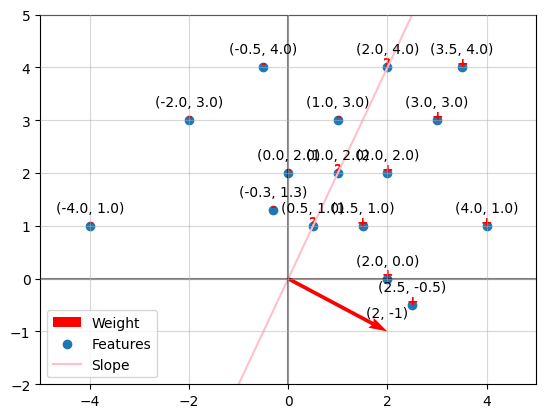

In [138]:
for feature in phi:
    signs.append(fw(feature))

# Plot the weight vector as a vector in 2D plane
plt.quiver(0, 0, w[0], w[1], color='red', label='Weight', angles='xy', scale_units='xy', scale=1)
plt.annotate(f'({w[0]}, {w[1]})', (w[0], w[1]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot the feature as points in 2D plane
plt.scatter(phi[:,0], phi[:,1], label='Features', zorder=1)

# Annotate: Place text coordinates and their corresponding classification (+ - ?)
for i in range(len(phi)):
    plt.annotate(f'({phi[i,0]}, {phi[i,1]})', (phi[i,0], phi[i,1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(signs[i], (phi[i,0], phi[i,1]), color='red', ha='center', zorder=2, weight=1000)

# Let's pick a point that is orthogonal to the weight vector
slope = 1.0 / 0.5 # slope = (y_2 - y_1) / (x_2 - x_1) = (1.0 - 0) / (0.5 - 0) (Origin coords)

# Plot the slop
plt.axline((0, 0), slope=slope, color='pink', label='Slope')

# Show x-y- axis lines
plt.axvline(0,color='black', alpha=0.5)
plt.axhline(0,color='black', alpha=0.5)

# Show grid
plt.grid(alpha=0.5)

# Set custom axes boundaries
plt.axis([-5, 5, -2, 5])

plt.legend(loc='lower left')
plt.show()